In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import plotly.express as px
import numpy as np
sns.set(color_codes = True)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#reading the data set
df1 = pd.read_csv("data/data1.csv")
df2 = pd.read_csv("data/data2.csv")
df3 = pd.read_csv("data/data3.csv")
df4 = pd.read_csv("data/data4.csv")
df5 = pd.read_csv("data/data5.csv")
df6 = pd.read_csv("data/data6.csv")
df7 = pd.read_csv("data/data7.csv")
df8 = pd.read_csv("data/data8.csv")
df9 = pd.read_csv("data/data9.csv")
df10 = pd.read_csv("data/data10.csv")
df11 = pd.read_csv("data/data11.csv")
data_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], axis=0)

In [3]:
data_df.describe()

,Unnamed: 0,votes
count,51717.000000,51717.000000
mean,25858.000000,283.697527
std,14929.556273,803.838853
min,0.000000,0.000000
25%,12929.000000,7.000000
50%,25858.000000,41.000000
75%,38787.000000,198.000000
max,51716.000000,16832.000000


In [4]:
data_df.head(5)

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


There are restaurents with no reviews, and the maximum number of review votes for restaurent are 16K.

Checking for null values in dataframe

In [5]:
data_df.isna().sum()

Unnamed: 0                         0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Checking the number of distinct values in each column

In [6]:
print(data_df.nunique())

Unnamed: 0                     51717
url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64


Checking data in rate column, the column needs clean up

In [7]:
data_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Replacing NEW, '-' and NAN with empty values in rate column.
Remove /5 from the rate column.
Remove spaces from the rate column.

In [8]:
data_df['rate'].replace('NEW', 0, regex=True, inplace=True)
data_df['rate'].replace('-', 0, regex=True, inplace=True)
data_df['rate'].replace(np.nan, 0, regex=True, inplace=True)
data_df['rate'] = data_df['rate'].apply(lambda x: str(x).split('/')[0])
data_df['rate'] = data_df['rate'].str.strip()
data_df['rate'] = data_df['rate'].apply(lambda r: float(r))
data_df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

Renaming columns for easy access

In [9]:
#renaming for easier access
data_df.rename(columns = {"listed_in(type)" : "listed_as"}, inplace=True)
data_df.rename(columns={'approx_cost(for two people)': 'cost_for_two'}, inplace=True)
data_df.rename(columns={'listed_in(city)': 'listed_in_city'}, inplace=True)

In [10]:
data_df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [11]:
data_df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

Replace Nulls in location and rest_type columns with listed city and listed type respectively. 

In [12]:
data_df.location.fillna(data_df.listed_in_city, inplace=True)
data_df.rest_type.fillna(data_df.listed_as, inplace=True)

In [13]:
def sortGroup(data):
    arr = data.split(', ')
    arr = sorted(arr)
    return ', '.join(str(i) for i in arr)

In [14]:
data_df['rest_type'] = data_df['rest_type'].apply(lambda x: sortGroup(x))

In [15]:
data_df['listed_as'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [16]:
data_df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [17]:
data_df['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [18]:
data_df['cost_for_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [19]:
data_df['cost_for_two'] = data_df['cost_for_two'].apply(lambda x: str(x).replace(',',''))
data_df['cost_for_two'] = data_df['cost_for_two'].apply(lambda r: float(r))

Removing special characters from restaurent name

In [20]:
data_df["name"] = data_df.name.str.replace('[^a-zA-Z0-9 .,&-@\']', '')

In [21]:
data_df = data_df.drop(["Unnamed: 0","url","phone","dish_liked","menu_item"], axis = 1)

In [22]:
data_df['reviews_list'] = data_df.groupby(['address','name','location'])['reviews_list'].transform(lambda x : ' '.join(x))
data_df.reviews_list.replace(to_replace=r"\] \[", value="," ,regex=True ,inplace=True)
data_df['reviews_list'].replace('\[\]', np.nan, regex=True, inplace=True)
data_df['listed_in_city'] = data_df.groupby(['address','name','location'])['listed_in_city'].transform(lambda x : ' '.join(x))
data_df['listed_as'] = data_df.groupby(['address','name','location'])['listed_as'].transform(lambda x : ' '.join(x))

In [23]:
data_df['rate'] = data_df.groupby(['address','name','location','reviews_list'])['rate'].transform('max')

In [24]:
data_df.duplicated().sum()

31477

In [25]:
data_df.drop_duplicates(inplace=True)
data_df.shape

(20240, 13)

In [26]:
data_df['reviews_list'] = data_df['reviews_list'].astype(str)

In [27]:
data_df.dropna(how='any',inplace=True)
data_df.shape

(19454, 13)

In [28]:
data_df = data_df.drop_duplicates(subset=["name","address","location","reviews_list","listed_in_city","listed_as"], keep='last')
data_df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,listed_as,listed_in_city
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet Delivery Dine-out Delivery,Banashankari Banashankari Banashankari Basavan...
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet Dine-out,Banashankari Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet Dine-out Buffet Dine-out,Banashankari Banashankari Basavanagudi Basavan...
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet Delivery Dine-out,Banashankari Banashankari Banashankari
10,"12,29 Near PES University Back Gate, D'Souza N...",Caf Down The Alley,Yes,No,4.1,402,Banashankari,Cafe,Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",Cafes Delivery Dine-out,Banashankari Banashankari Banashankari


In [29]:
data_df.shape

(11793, 13)

In [30]:
data_df.dtypes

address            object
name               object
online_order       object
book_table         object
rate              float64
votes               int64
location           object
rest_type          object
cuisines           object
cost_for_two      float64
reviews_list       object
listed_as          object
listed_in_city     object
dtype: object

Checking the distribution of ratings

2.8936742135165043


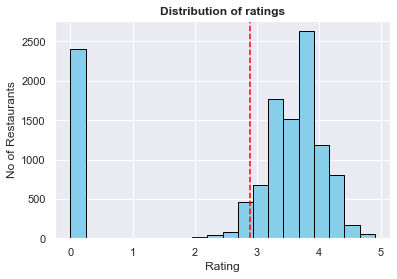

In [31]:
plt.hist(data_df['rate'], color = 'skyblue', edgecolor = 'black',bins = int(100/5))
plt.axvline(x = data_df['rate'].mean(),ls='--',color='red')
plt.title('Distribution of ratings',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data_df['rate'].mean())
plt.show()

In [32]:
data_df.online_order.replace(('Yes','No'),(1, 0),inplace=True)
data_df.book_table.replace(('Yes','No'),(1, 0),inplace=True)
data_df.dtypes

address            object
name               object
online_order        int64
book_table          int64
rate              float64
votes               int64
location           object
rest_type          object
cuisines           object
cost_for_two      float64
reviews_list       object
listed_as          object
listed_in_city     object
dtype: object

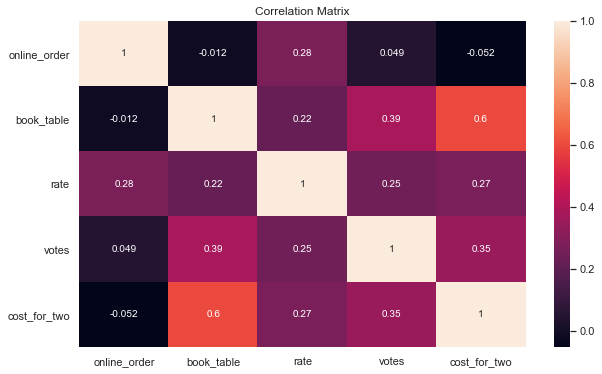

In [33]:
heat_corr = data_df.corr()
plt.figure(figsize=(10, 6))
corr_matrix = sns.heatmap(heat_corr, annot=True)
corr_matrix.set_yticklabels(corr_matrix.get_yticklabels(), rotation=360)

plt.title("Correlation Matrix")
plt.show()

In [34]:
mean_ratings = data_df.groupby(['name'], as_index=False)['rate','votes'].mean()
mean_ratings.columns=['name','mean_rating','mean_votes']
mean_ratings = mean_ratings.sort_values("mean_rating", ascending=False)
top_20 = mean_ratings.head(20)
top_20.head(20)

,name,mean_rating,mean_votes
558,Asia Kitchen By Mainland China,4.90,2256.00
5602,Punjab Grill,4.90,1319.50
1195,Byg Brewski Brewing Company,4.90,16832.00
6179,Sant Spa Cuisine,4.90,246.00
805,Belgian Waffle Factory,4.85,649.75
2462,Flechazo,4.80,5079.00
1210,CTR,4.80,4421.00
5171,O.G. Variar & Sons,4.80,1161.00
749,Barbecue by Punjab Grill,4.80,1367.00
7592,The Pizza Bakery,4.80,1785.00


Text(-8.449999999999996, 0.5, 'No of Votes')

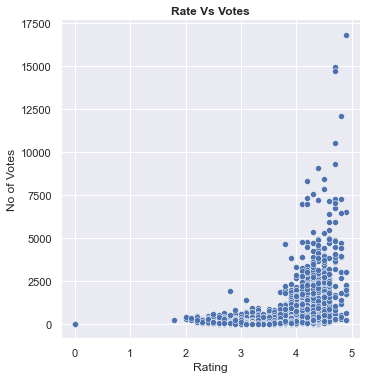

In [35]:
sns.relplot(x="rate", y="votes", data=data_df)
plt.title('Rate Vs Votes',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Votes')

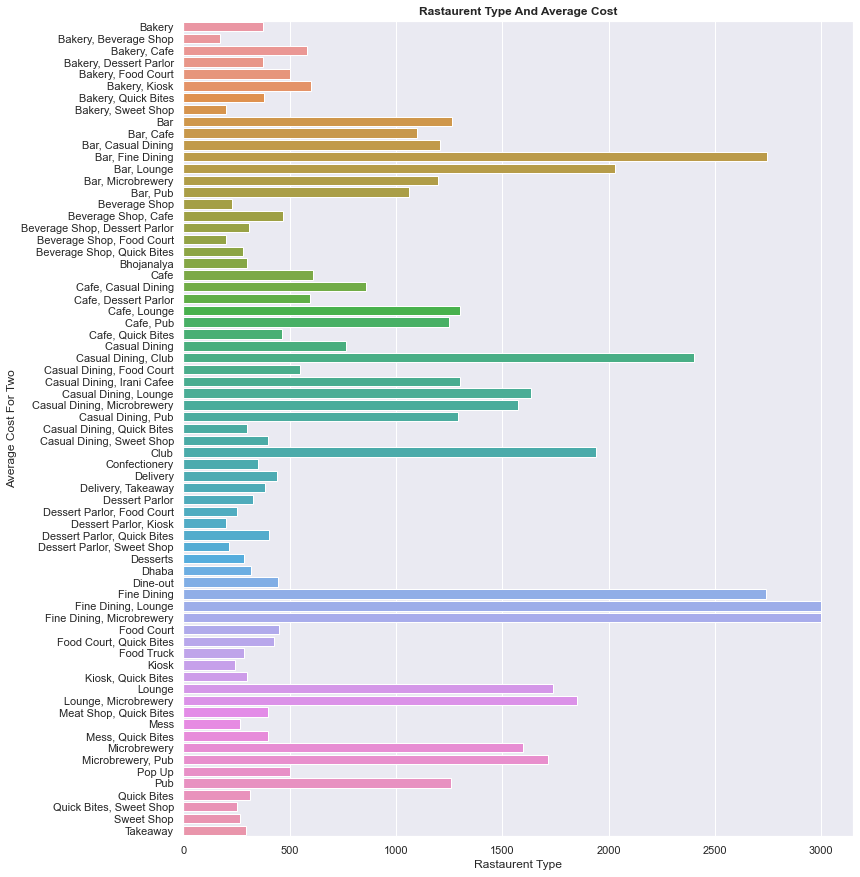

In [36]:
mean_costs = data_df.groupby(['rest_type'], as_index=False)['rate','cost_for_two'].mean()
mean_costs.columns=['rest_type','rating','cost_for_two']

plt.figure(figsize=(12, 15))
sns.barplot(x="cost_for_two", y="rest_type", data=mean_costs,orient='h')
plt.title('Rastaurent Type And Average Cost',weight='bold')
plt.xlabel('Rastaurent Type')
plt.ylabel('Average Cost For Two')
plt.show()

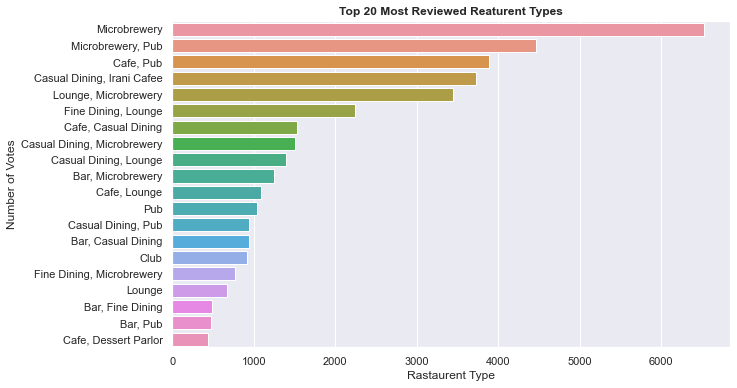

In [37]:
mean_votes = data_df.groupby(['rest_type'], as_index=False)['votes'].mean()
mean_votes.columns=['rest_type','votes']
mean_votes = mean_votes.sort_values("votes", ascending=False)
top_voted_20 = mean_votes.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x="votes", y="rest_type", data=top_voted_20,orient='h')
plt.title('Top 20 Most Reviewed Reaturent Types',weight='bold')
plt.xlabel('Rastaurent Type')
plt.ylabel('Number of Votes')
plt.show()

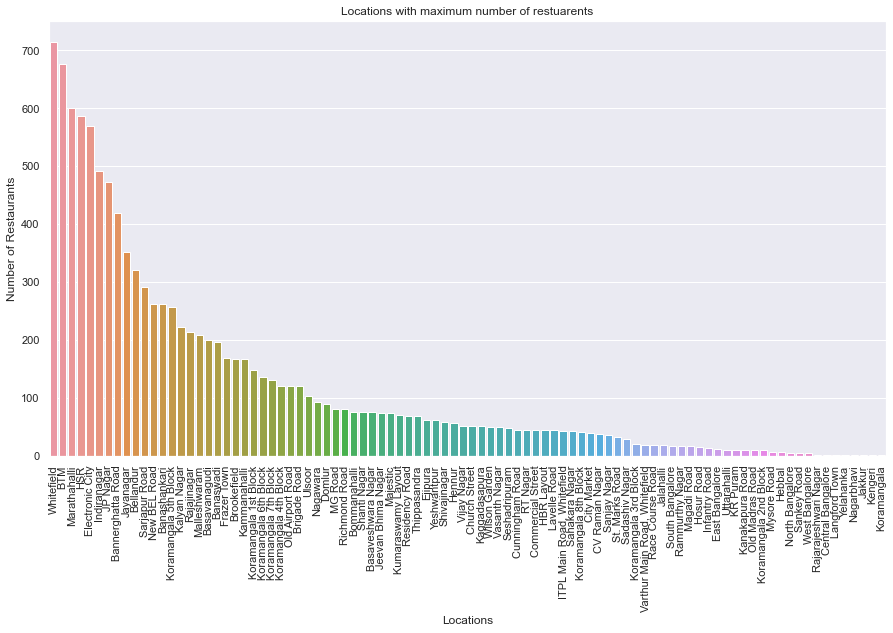

In [38]:
city_counts = data_df.groupby(['location'], as_index=False)['address'].nunique()

city_counts.columns=['location','number_of_restaurents']
city_counts = city_counts.sort_values("number_of_restaurents", ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x="location", y="number_of_restaurents", data = city_counts )
plt.xticks(rotation=90)
plt.xlabel('Locations')
plt.ylabel('Number of Restaurants')
plt.title('Locations with maximum number of restuarents')
plt.show()

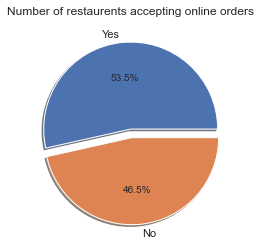

In [39]:
online_df = data_df['online_order'].value_counts()
plt.pie(online_df.values, labels=['Yes','No'], autopct='%1.1f%%', explode=(0, 0.1) ,shadow=True)
plt.title('Number of restaurents accepting online orders')
plt.show()

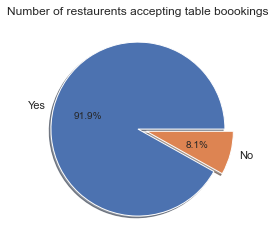

In [40]:
table_booking_df = data_df['book_table'].value_counts()
plt.pie(table_booking_df.values, labels=['Yes','No'], autopct='%1.1f%%', explode=(0, 0.1) ,shadow=True)
plt.title('Number of restaurents accepting table boookings')
plt.show()

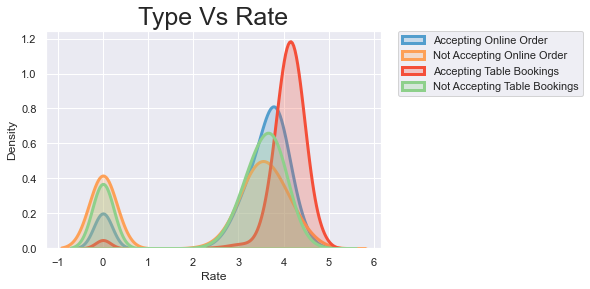

In [41]:
g = sns.distplot(data_df[data_df['online_order']==1]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Accepting Online Order',color='#539ecd')
g = sns.distplot(data_df[data_df['online_order']==0]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Not Accepting Online Order',color='#fda057')
g = sns.distplot(data_df[data_df['book_table']==1]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Accepting Table Bookings',color='#f44f39')
g = sns.distplot(data_df[data_df['book_table']==0]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Not Accepting Table Bookings',color='#8ed08b')

plt.title('Type Vs Rate', fontsize=25)
plt.xlabel('Rate')
plt.legend(['Accepting Online Order', 'Not Accepting Online Order','Accepting Table Bookings','Not Accepting Table Bookings'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

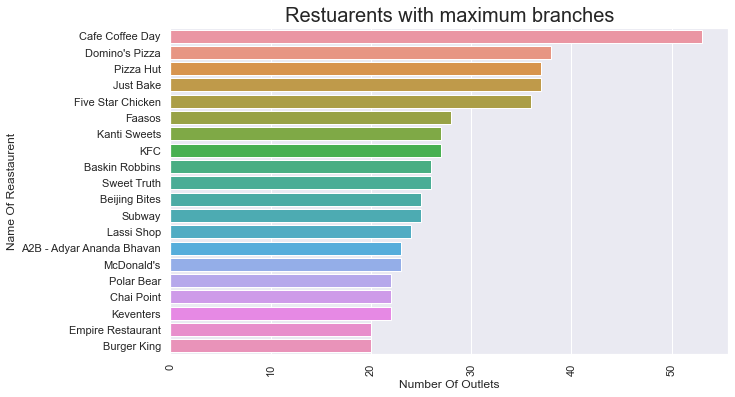

In [42]:
outlet_counts = data_df.groupby(['name'], as_index=False)['address'].nunique()

outlet_counts.columns=['name','number_of_oulets']
outlet_counts = outlet_counts.sort_values("number_of_oulets", ascending=False)
outlet_counts = outlet_counts.head(20)
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x="number_of_oulets", y="name", data=outlet_counts,orient ='h')
plt.ylabel('Name Of Reastaurent')
plt.xlabel('Number Of Outlets')
plt.title('Restuarents with maximum branches', fontsize=20)
plt.show()

In [43]:
data_df.reviews_list.replace(to_replace=r'\\n',value=' ',regex=True,inplace=True)
data_df.reviews_list.replace(to_replace=r"'\(',",value=' ',regex=True,inplace=True)
data_df.reviews_list.replace(to_replace=r'"',value="'",regex=True,inplace=True)
data_df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,listed_as,listed_in_city
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED Had been here for dinn...",Buffet Delivery Dine-out Delivery,Banashankari Banashankari Banashankari Basavan...
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', 'RATED Great food and proper ...",Buffet Dine-out,Banashankari Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED Very good restaurant i...",Buffet Dine-out Buffet Dine-out,Banashankari Banashankari Basavanagudi Basavan...
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED Awesome food ??Great s...",Buffet Delivery Dine-out,Banashankari Banashankari Banashankari
10,"12,29 Near PES University Back Gate, D'Souza N...",Caf Down The Alley,1,0,4.1,402,Banashankari,Cafe,Cafe,500.0,"[('Rated 4.0', 'RATED We ended up here on a ...",Cafes Delivery Dine-out,Banashankari Banashankari Banashankari
